<a href="https://colab.research.google.com/github/krishna-46/Deep_learning/blob/main/fashion_mnist_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [ ]:
tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_train , y_train),(x_test , y_test)=tf.keras.datasets.fashion_mnist.load_data()

y_train : [9 0 0 ... 3 0 5]


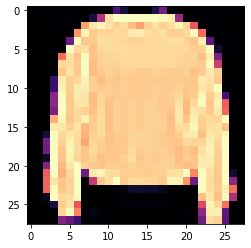

In [ ]:
print("y_train :",y_train)
import matplotlib.pyplot as plt
plt.imshow(x_train[7],cmap='magma')
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512 , activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')

])

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import os , datetime

log =os.path.join('logs',datetime.datetime.now().strftime('%y%m%d-%H%M%S'))
tc = tf.keras.callbacks.TensorBoard(log,histogram_freq=1)

In [ ]:
cp = 'Model_checkpoint/CP-{epoch:04d}.ckpt'
cpd=os.path.dirname(cp)
cpc = tf.keras.callbacks.ModelCheckpoint(
    cp,monitor='val_acc' , verbose=1,save_weight_only=True,
    save_freq='epoch'
)

In [ ]:
history =model.fit(x_train , y_train,epochs=5,validation_data=(x_test , y_test), callbacks=[tc,cpc])
loss,acc =model.evaluate(x_test , y_test , verbose=1)
print('orginal model , accuracy:{:5.2f}%'.format(100*acc))

Epoch 1/5
1873/1875 [============================>.] - ETA: 0s - loss: 3.1298 - accuracy: 0.7094
Epoch 1: saving model to Model_checkpoint/CP-0001.ckpt
1875/1875 [==============================] - 16s 8ms/step - loss: 3.1274 - accuracy: 0.7094 - val_loss: 0.6684 - val_accuracy: 0.7794
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.7428 - accuracy: 0.7381
Epoch 2: saving model to Model_checkpoint/CP-0002.ckpt
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7428 - accuracy: 0.7381 - val_loss: 0.6432 - val_accuracy: 0.7738
Epoch 3/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.7207 - accuracy: 0.7475
Epoch 3: saving model to Model_checkpoint/CP-0003.ckpt
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7206 - accuracy: 0.7475 - val_loss: 0.5782 - val_accuracy: 0.8110
Epoch 4/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.6683 - accuracy: 0.7675
Epoch 4: saving model to Model_checkpoint/CP-